In [1]:
import pandas as pd 
import sys
import pandas_profiling 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Data_Complete.csv')

In [3]:
#data.drop('Unnamed: 0', axis=1, inplace=True)
data.shape

(12713917, 38)

In [5]:
#creating paid and unpaid dataset
paid = data[(data.Closure_Type == 'SETTLE') | (data.Closure_Type == 'PIF')]
unpaid = data[(data.Closure_Type != 'SETTLE') & (data.Closure_Type != 'PIF')]

In [5]:
paid_groupby_age = paid.groupby(by=['Age_range'])
unpaid_groupby_age = unpaid.groupby(by=['Age_range'])
total_groupby_age = data.groupby(by=['Age_range'])

# Group by `Unemply_rate_range`

In [6]:
a = paid.groupby(['Unemply_rate_range'])['Total_Paid'].size().reset_index()
a.rename(columns={'Total_Paid': 'Total_Paid_Count'}, inplace=True)

In [7]:
b = unpaid.groupby(['Unemply_rate_range'])['Total_Paid'].size().reset_index()
b.rename(columns={'Total_Paid' : 'Unpaid_Count'}, inplace=True)

In [10]:
ab = pd.merge(b, a, on=['Unemply_rate_range'])

In [12]:
ab['Total_Accounts'] = ab.Unpaid_Count + ab.Total_Paid_Count

In [13]:
ab['Percent_Paid'] = round((ab.Total_Paid_Count / ab.Total_Accounts)*100, 2)

In [14]:
ab['%_of_Paid'] = round((ab.Total_Paid_Count / ab.Total_Paid_Count.sum())*100, 2)

In [15]:
ab

,Unemply_rate_range,Unpaid_Count,Total_Paid_Count,Total_Accounts,Percent_Paid,%_of_Paid
0,0-2.9%,238457,14836,253293,5.86,2.67
1,11-14.9%,1714247,57970,1772217,3.27,10.42
2,15-19.9%,689264,19098,708362,2.70,3.43
3,20-29.9%,273814,8654,282468,3.06,1.55
4,3-4.9%,1344298,93692,1437990,6.52,16.83
5,30-39.9%,27501,696,28197,2.47,0.13
6,40-49.9%,3458,116,3574,3.25,0.02
7,5-6.9%,2897761,163916,3061677,5.35,29.45
8,50%+,308568,8035,316603,2.54,1.44
9,7-8.9%,2658234,117832,2776066,4.24,21.17


In [20]:
c = data.groupby(by=['Unemply_rate_range'])['Invoice_bal'].mean().reset_index()
c.rename(columns={'Invoice_bal' : 'Avg_Inv_bal'}, inplace=True)

In [21]:
d = paid.groupby(by=['Unemply_rate_range'])['Invoice_bal'].mean().reset_index()
d.rename(columns={'Invoice_bal' : 'Paid_Avg_Inv_bal'}, inplace=True)

In [22]:
e = paid.groupby(by=['Unemply_rate_range'])['Total_Paid'].mean().reset_index()
e.rename(columns={'Total_Paid' : 'Avg_Collected'}, inplace=True)

In [23]:
f = paid.groupby(by=['Unemply_rate_range'])['Total_Paid'].sum().reset_index()
f.rename(columns={'Total_Paid' : 'Total_Collected'}, inplace=True)

In [24]:
g = data.groupby(by=['Unemply_rate_range'])['Invoice_bal'].sum().reset_index()
g.rename(columns={'Total_Paid' : 'Total_Inv_bal'}, inplace=True)

In [25]:
cd = pd.merge(c,d, on='Unemply_rate_range')
cde = pd.merge( cd,e , on='Unemply_rate_range')
cdef = pd.merge(cde, f, on='Unemply_rate_range')
cdefg = pd.merge(cdef, g, on='Unemply_rate_range')
cdefg['%_Collected'] = round((cdefg.Total_Collected / cdefg.Invoice_bal) * 100, 2)


In [26]:
unemply_groupby = pd.merge(ab, cdefg, on='Unemply_rate_range')

In [30]:
unemply_groupby['%_of_Total_Accounts'] = round((unemply_groupby.Total_Accounts / unemply_groupby.Total_Accounts.sum()) * 100, 2)

In [31]:
unemply_groupby.sort_values('Percent_Paid', ascending=False)

,Unemply_rate_range,Unpaid_Count,Total_Paid_Count,Total_Accounts,Percent_Paid,%_of_Paid,Avg_Inv_bal,Paid_Avg_Inv_bal,Avg_Collected,Total_Collected,Invoice_bal,%_Collected,%_of_Total_Accounts
4,3-4.9%,1344298,93692,1437990,6.52,16.83,897.567556,406.729789,251.060439,23454819.37,1.290693e+09,1.82,11.31
0,0-2.9%,238457,14836,253293,5.86,2.67,903.052269,434.215238,265.007432,3923965.04,2.287368e+08,1.72,1.99
7,5-6.9%,2897761,163916,3061677,5.35,29.45,927.827588,413.917773,252.984842,41312677.67,2.840708e+09,1.45,24.08
9,7-8.9%,2658234,117832,2776066,4.24,21.17,894.525110,418.979731,257.356408,30212870.23,2.483261e+09,1.22,21.83
10,9-10.9%,2001779,71691,2073470,3.46,12.88,906.349237,411.454408,252.426265,18029798.40,1.879288e+09,0.96,16.31
1,11-14.9%,1714247,57970,1772217,3.27,10.42,930.087976,427.237572,259.077790,14956819.87,1.648318e+09,0.91,13.94
6,40-49.9%,3458,116,3574,3.25,0.02,803.418570,621.645172,381.904609,43919.03,2.871418e+06,1.53,0.03
3,20-29.9%,273814,8654,282468,3.06,1.55,871.056176,332.158522,204.244086,1765894.37,2.460455e+08,0.72,2.22
2,15-19.9%,689264,19098,708362,2.70,3.43,915.891793,394.251424,239.857555,4559452.27,6.487829e+08,0.70,5.57
8,50%+,308568,8035,316603,2.54,1.44,997.620421,514.594810,324.006983,2590435.83,3.158496e+08,0.82,2.49


In [32]:
unemply_groupby

,Unemply_rate_range,Unpaid_Count,Total_Paid_Count,Total_Accounts,Percent_Paid,%_of_Paid,Avg_Inv_bal,Paid_Avg_Inv_bal,Avg_Collected,Total_Collected,Invoice_bal,%_Collected,%_of_Total_Accounts
0,0-2.9%,238457,14836,253293,5.86,2.67,903.052269,434.215238,265.007432,3923965.04,2.287368e+08,1.72,1.99
1,11-14.9%,1714247,57970,1772217,3.27,10.42,930.087976,427.237572,259.077790,14956819.87,1.648318e+09,0.91,13.94
2,15-19.9%,689264,19098,708362,2.70,3.43,915.891793,394.251424,239.857555,4559452.27,6.487829e+08,0.70,5.57
3,20-29.9%,273814,8654,282468,3.06,1.55,871.056176,332.158522,204.244086,1765894.37,2.460455e+08,0.72,2.22
4,3-4.9%,1344298,93692,1437990,6.52,16.83,897.567556,406.729789,251.060439,23454819.37,1.290693e+09,1.82,11.31
5,30-39.9%,27501,696,28197,2.47,0.13,892.333634,339.020101,208.305403,144563.95,2.516113e+07,0.57,0.22
6,40-49.9%,3458,116,3574,3.25,0.02,803.418570,621.645172,381.904609,43919.03,2.871418e+06,1.53,0.03
7,5-6.9%,2897761,163916,3061677,5.35,29.45,927.827588,413.917773,252.984842,41312677.67,2.840708e+09,1.45,24.08
8,50%+,308568,8035,316603,2.54,1.44,997.620421,514.594810,324.006983,2590435.83,3.158496e+08,0.82,2.49
9,7-8.9%,2658234,117832,2776066,4.24,21.17,894.525110,418.979731,257.356408,30212870.23,2.483261e+09,1.22,21.83


In [75]:
dist_age = age_groupby.set_index("Age_range")

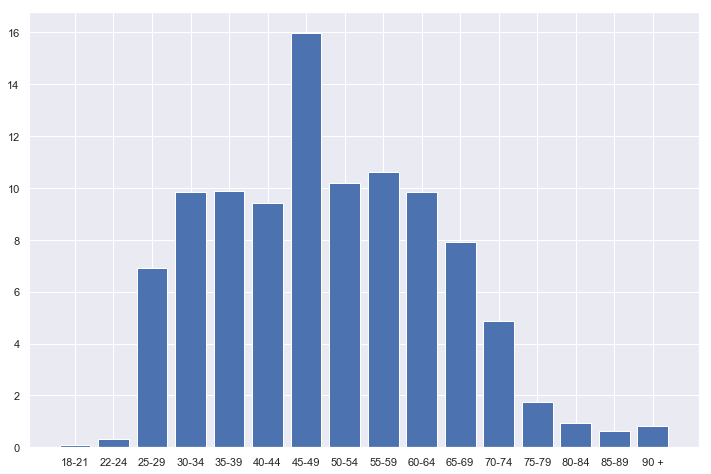

In [84]:
plt.figure(figsize=(12,8))
plt.bar(dist_age.index, dist_age['%_of_Paid']);

In [71]:
import seaborn as sns 
sns.set(color_codes=True)

## Observations: 
We can observe that age range 45-49 has the most paid accounts. We can use this information to segment accounts down the road to prioritize the age group in combination with other features that are considered important. 

# Group by `Income_level`

In [26]:
h = unpaid.groupby(['Income_level'])['Total_Paid'].size().reset_index()
h.rename(columns={'Total_Paid' : 'Unpaid_Count'}, inplace=True)

i = paid.groupby(['Income_level'])['Total_Paid'].size().reset_index()
i.rename(columns={'Total_Paid': 'Total_Paid_Count'}, inplace=True)

In [27]:
hi = pd.merge(h,i, on='Income_level')

In [28]:
hi['Total_Accounts'] = hi.Unpaid_Count + hi.Total_Paid_Count
hi['Percent_Paid'] = round((hi.Total_Paid_Count / hi.Total_Accounts)*100, 2)
hi['%_of_Paid'] = round((hi.Total_Paid_Count / hi.Total_Paid_Count.sum())*100, 2)

In [29]:
hi

,Income_level,Unpaid_Count,Total_Paid_Count,Total_Accounts,Percent_Paid,%_of_Paid
0,0ver_150k,2416,253,2669,9.48,0.05
1,100k_to_150k,83797,8121,91918,8.84,1.46
2,20k_to_25k,33744,920,34664,2.65,0.17
3,25k_to_35k,729775,21235,751010,2.83,3.82
4,35k_to_50k,4300719,165388,4466107,3.70,29.72
5,50k_to_75k,6318230,313950,6632180,4.73,56.41
6,75k_to_100k,673533,46264,719797,6.43,8.31
7,Under_20k,15167,405,15572,2.60,0.07


In [30]:
j = data.groupby(by=['Income_level'])['Invoice_bal'].mean().reset_index()
j.rename(columns={'Invoice_bal' : 'Avg_Inv_bal'}, inplace=True)
k = paid.groupby(by=['Income_level'])['Invoice_bal'].mean().reset_index()
k.rename(columns={'Invoice_bal' : 'Paid_Avg_Inv_bal'}, inplace=True)
l = paid.groupby(by=['Income_level'])['Total_Paid'].mean().reset_index()
l.rename(columns={'Total_Paid' : 'Avg_Collected'}, inplace=True)
m = paid.groupby(by=['Income_level'])['Total_Paid'].sum().reset_index()
m.rename(columns={'Total_Paid' : 'Total_Collected'}, inplace=True)
n = data.groupby(by=['Income_level'])['Invoice_bal'].sum().reset_index()
n.rename(columns={'Total_Paid' : 'Total_Inv_bal'}, inplace=True)

In [31]:
jk = pd.merge(j,k, on='Income_level')
jkl = pd.merge(jk, l, on='Income_level')
jklm = pd.merge(jkl, m, on='Income_level')
jklmn = pd.merge(jklm, n, on='Income_level')

In [32]:
income_groupby = pd.merge(hi, jklmn, on='Income_level')

In [33]:
income_groupby['%_of_Total_Accounts'] = round((income_groupby.Total_Accounts / income_groupby.Total_Accounts.sum()) * 100, 2)

In [34]:
income_groupby

,Income_level,Unpaid_Count,Total_Paid_Count,Total_Accounts,Percent_Paid,%_of_Paid,Avg_Inv_bal,Paid_Avg_Inv_bal,Avg_Collected,Total_Collected,Invoice_bal,%_of_Total_Accounts
0,0ver_150k,2416,253,2669,9.48,0.05,717.847389,523.261028,367.090593,9.287392e+04,1.915935e+06,0.02
1,100k_to_150k,83797,8121,91918,8.84,1.46,972.084307,396.673157,249.823524,2.019823e+06,8.935205e+07,0.72
2,20k_to_25k,33744,920,34664,2.65,0.17,996.420976,501.071293,311.529597,2.856726e+05,3.453994e+07,0.27
3,25k_to_35k,729775,21235,751010,2.83,3.82,958.895156,441.474258,268.457180,5.691292e+06,7.201399e+08,5.91
4,35k_to_50k,4300719,165388,4466107,3.70,29.72,849.386189,403.421853,246.323789,4.064958e+07,3.793450e+09,35.13
5,50k_to_75k,6318230,313950,6632180,4.73,56.41,939.647532,413.901453,253.580320,7.930268e+07,6.231912e+09,52.16
6,75k_to_100k,673533,46264,719797,6.43,8.31,1003.123428,450.681812,279.811487,1.285118e+07,7.220452e+08,5.66
7,Under_20k,15167,405,15572,2.60,0.07,1050.682472,425.443259,252.743366,1.021083e+05,1.636123e+07,0.12


## Observations: 
We notice that 87% of the total accounts that paid, falls under income level 50k-75k and 75k-100k. We can use this to segment the accounts further down the road, starting with accounts that fall under this income level. 

# Group by `Age_range` & `Income_level`

In [35]:
o = unpaid.groupby(['Age_range','Income_level'])['Total_Paid'].size().reset_index()
o.rename(columns={'Total_Paid' : 'Unpaid_Count'}, inplace=True)

p = paid.groupby(['Age_range','Income_level'])['Total_Paid'].size().reset_index()
p.rename(columns={'Total_Paid': 'Total_Paid_Count'}, inplace=True)

In [36]:
op = pd.merge(o,p, on=['Age_range','Income_level'])

In [37]:
op['Total_Accounts'] = op.Unpaid_Count + op.Total_Paid_Count
op['Percent_Paid'] = round((op.Total_Paid_Count / op.Total_Accounts)*100, 2)
op['%_of_Paid'] = round((op.Total_Paid_Count / op.Total_Paid_Count.sum())*100, 2)

In [38]:
q = data.groupby(by=['Age_range','Income_level'])['Invoice_bal'].mean().reset_index()
q.rename(columns={'Invoice_bal' : 'Avg_Inv_bal'}, inplace=True)
r = paid.groupby(by=['Age_range','Income_level'])['Invoice_bal'].mean().reset_index()
r.rename(columns={'Invoice_bal' : 'Paid_Avg_Inv_bal'}, inplace=True)
s = paid.groupby(by=['Age_range','Income_level'])['Total_Paid'].mean().reset_index()
s.rename(columns={'Total_Paid' : 'Avg_Collected'}, inplace=True)
t = paid.groupby(by=['Age_range','Income_level'])['Total_Paid'].sum().reset_index()
t.rename(columns={'Total_Paid' : 'Total_Collected'}, inplace=True)
u = data.groupby(by=['Age_range','Income_level'])['Invoice_bal'].sum().reset_index()
u.rename(columns={'Total_Paid' : 'Total_Inv_bal'}, inplace=True)

In [39]:
qr = pd.merge(q,r, on=['Age_range','Income_level'])
qrs = pd.merge(qr, s, on=['Age_range','Income_level'])
qrst = pd.merge(qrs, t, on=['Age_range','Income_level'])
qrstu = pd.merge(qrst, u, on=['Age_range','Income_level'])

In [40]:
age_income_groupby = pd.merge(op, qrstu, on=['Age_range','Income_level'])

In [41]:
age_income_groupby['%_of_Total_Accounts'] = round((age_income_groupby.Total_Accounts / age_income_groupby.Total_Accounts.sum()) * 100, 2)

In [42]:
age_income_groupby[age_income_groupby.Income_level == '25k_to_35k']

,Age_range,Income_level,Unpaid_Count,Total_Paid_Count,Total_Accounts,Percent_Paid,%_of_Paid,Avg_Inv_bal,Paid_Avg_Inv_bal,Avg_Collected,Total_Collected,Invoice_bal,%_of_Total_Accounts
2,18-21,25k_to_35k,710,29,739,3.92,0.01,730.201949,288.478966,177.594483,5150.24,5.396192e+05,0.01
10,22-24,25k_to_35k,1074,57,1131,5.04,0.01,922.162759,368.490175,236.644821,13252.11,1.042966e+06,0.01
17,25-29,25k_to_35k,49381,1462,50843,2.88,0.26,913.837740,505.827893,307.364021,448751.47,4.646225e+07,0.40
25,30-34,25k_to_35k,99613,2189,101802,2.15,0.39,986.462366,490.207149,297.322870,650542.44,1.004238e+08,0.80
33,35-39,25k_to_35k,99134,2097,101231,2.07,0.38,983.470907,468.306500,289.922156,607676.84,9.955774e+07,0.80
41,40-44,25k_to_35k,88250,1914,90164,2.12,0.34,971.998734,417.525319,266.112385,508806.88,8.763929e+07,0.71
49,45-49,25k_to_35k,105924,3400,109324,3.11,0.61,866.208577,423.205082,255.918064,869865.50,9.469739e+07,0.86
57,50-54,25k_to_35k,74759,2133,76892,2.77,0.38,1057.689828,429.076962,270.169042,575460.06,8.132789e+07,0.60
65,55-59,25k_to_35k,71017,2063,73080,2.82,0.37,1070.658620,443.575928,259.469854,534767.37,7.824373e+07,0.57
73,60-64,25k_to_35k,53284,2222,55506,4.00,0.40,1061.627667,428.849500,254.936027,564683.30,5.892671e+07,0.44


# Group by `Age_range` and `Income_Level` and `Unemply_rate` 

In [43]:
aa = unpaid.groupby(['Age_range','Income_level','Unemply_rate_range'])['Total_Paid'].size().reset_index()
aa.rename(columns={'Total_Paid' : 'Unpaid_Count'}, inplace=True)

bb = paid.groupby(['Age_range','Income_level','Unemply_rate_range'])['Total_Paid'].size().reset_index()
bb.rename(columns={'Total_Paid': 'Total_Paid_Count'}, inplace=True)

In [44]:
aabb = pd.merge(aa,bb, on=['Age_range','Income_level','Unemply_rate_range'])
aabb['Total_Accounts'] = aabb.Unpaid_Count + aabb.Total_Paid_Count
aabb['Percent_Paid'] = round((aabb.Total_Paid_Count / aabb.Total_Accounts)*100, 2)
aabb['%_of_Paid'] = round((aabb.Total_Paid_Count / aabb.Total_Paid_Count.sum())*100, 2)

In [45]:
cc = data.groupby(by=['Age_range','Income_level','Unemply_rate_range'])['Invoice_bal'].mean().reset_index()
cc.rename(columns={'Invoice_bal' : 'Avg_Inv_bal'}, inplace=True)
dd = paid.groupby(by=['Age_range','Income_level','Unemply_rate_range'])['Invoice_bal'].mean().reset_index()
dd.rename(columns={'Invoice_bal' : 'Paid_Avg_Inv_bal'}, inplace=True)
ee = paid.groupby(by=['Age_range','Income_level','Unemply_rate_range'])['Total_Paid'].mean().reset_index()
ee.rename(columns={'Total_Paid' : 'Avg_Collected'}, inplace=True)
ff = paid.groupby(by=['Age_range','Income_level','Unemply_rate_range'])['Total_Paid'].sum().reset_index()
ff.rename(columns={'Total_Paid' : 'Total_Collected'}, inplace=True)
gg = data.groupby(by=['Age_range','Income_level','Unemply_rate_range'])['Invoice_bal'].sum().reset_index()
gg .rename(columns={'Total_Paid' : 'Total_Inv_bal'}, inplace=True)

In [46]:
ccdd = pd.merge(cc, dd, on=['Age_range','Income_level','Unemply_rate_range'])
ccddee = pd.merge(ccdd, ee, on=['Age_range','Income_level','Unemply_rate_range'])
ccddeeff = pd.merge(ccddee, ff, on=['Age_range','Income_level','Unemply_rate_range'])
ccddeeffgg = pd.merge(ccddeeff, gg, on=['Age_range','Income_level','Unemply_rate_range'])

In [47]:
a_i_e_groupby = pd.merge(aabb, ccddeeffgg, on=['Age_range','Income_level','Unemply_rate_range'])
a_i_e_groupby['%_of_Total_Accounts'] = round((a_i_e_groupby.Total_Accounts / a_i_e_groupby.Total_Accounts.sum()) * 100, 2)

In [48]:
a_i_e_groupby[a_i_e_groupby.Age_range == '30-34']

,Age_range,Income_level,Unemply_rate_range,Unpaid_Count,Total_Paid_Count,Total_Accounts,Percent_Paid,%_of_Paid,Avg_Inv_bal,Paid_Avg_Inv_bal,Avg_Collected,Total_Collected,Invoice_bal,%_of_Total_Accounts
143,30-34,0ver_150k,0-2.9%,8,2,10,20.00,0.00,683.536000,50.000000,50.000000,100.00,6.835360e+03,0.00
144,30-34,0ver_150k,3-4.9%,94,17,111,15.32,0.00,1008.494685,439.346471,299.526471,5091.95,1.119429e+05,0.00
145,30-34,0ver_150k,5-6.9%,35,3,38,7.89,0.00,928.301842,690.803333,522.470000,1567.41,3.527547e+04,0.00
146,30-34,0ver_150k,50%+,5,1,6,16.67,0.00,979.533333,352.000000,250.000000,250.00,5.877200e+03,0.00
147,30-34,0ver_150k,9-10.9%,1,1,2,50.00,0.00,724.380000,906.760000,906.760000,906.76,1.448760e+03,0.00
148,30-34,100k_to_150k,0-2.9%,233,28,261,10.73,0.01,779.746743,368.568571,205.093214,5742.61,2.035139e+05,0.00
149,30-34,100k_to_150k,3-4.9%,2080,205,2285,8.97,0.04,962.246114,465.204146,300.002488,61500.51,2.198732e+06,0.02
150,30-34,100k_to_150k,5-6.9%,2790,239,3029,7.89,0.04,1362.466652,591.197113,358.258787,85623.85,4.126911e+06,0.02
151,30-34,100k_to_150k,50%+,70,5,75,6.67,0.00,1102.512267,1185.650000,917.264000,4586.32,8.268842e+04,0.00
152,30-34,100k_to_150k,7-8.9%,983,46,1029,4.47,0.01,1088.222536,673.651304,416.959556,18763.18,1.119781e+06,0.01


# Group by `Age_range` and `Income_Level` and `Education_college` and `Unemply_rate` 

In [57]:
aa = unpaid.groupby(['Age_range','Income_level','Education_college','Unemply_rate_range'])['Total_Paid'].size().reset_index()
aa.rename(columns={'Total_Paid' : 'Unpaid_Count'}, inplace=True)

bb = paid.groupby(['Age_range','Income_level','Education_college','Unemply_rate_range'])['Total_Paid'].size().reset_index()
bb.rename(columns={'Total_Paid': 'Total_Paid_Count'}, inplace=True)

In [58]:
aabb = pd.merge(aa,bb, on=['Age_range','Income_level','Education_college','Unemply_rate_range'])
aabb['Total_Accounts'] = aabb.Unpaid_Count + aabb.Total_Paid_Count
aabb['Percent_Paid'] = round((aabb.Total_Paid_Count / aabb.Total_Accounts)*100, 2)
aabb['%_of_Paid'] = round((aabb.Total_Paid_Count / aabb.Total_Paid_Count.sum())*100, 2)

In [59]:
cc = data.groupby(by=['Age_range','Income_level','Education_college','Unemply_rate_range'])['Invoice_bal'].mean().reset_index()
cc.rename(columns={'Invoice_bal' : 'Avg_Inv_bal'}, inplace=True)
dd = paid.groupby(by=['Age_range','Income_level','Education_college','Unemply_rate_range'])['Invoice_bal'].mean().reset_index()
dd.rename(columns={'Invoice_bal' : 'Paid_Avg_Inv_bal'}, inplace=True)
ee = paid.groupby(by=['Age_range','Income_level','Education_college','Unemply_rate_range'])['Total_Paid'].mean().reset_index()
ee.rename(columns={'Total_Paid' : 'Avg_Collected'}, inplace=True)
ff = paid.groupby(by=['Age_range','Income_level','Education_college','Unemply_rate_range'])['Total_Paid'].sum().reset_index()
ff.rename(columns={'Total_Paid' : 'Total_Collected'}, inplace=True)
gg = data.groupby(by=['Age_range','Income_level','Education_college','Unemply_rate_range'])['Invoice_bal'].sum().reset_index()
gg .rename(columns={'Total_Paid' : 'Total_Inv_bal'}, inplace=True)

In [60]:
ccdd = pd.merge(cc, dd, on=['Age_range','Income_level','Education_college','Unemply_rate_range'])
ccddee = pd.merge(ccdd, ee, on=['Age_range','Income_level','Education_college','Unemply_rate_range'])
ccddeeff = pd.merge(ccddee, ff, on=['Age_range','Income_level','Education_college','Unemply_rate_range'])
ccddeeffgg = pd.merge(ccddeeff, gg, on=['Age_range','Income_level','Education_college','Unemply_rate_range'])

In [63]:
aieu_groupby = pd.merge(aabb, ccddeeffgg, on=['Age_range','Income_level','Education_college','Unemply_rate_range'])
aieu_groupby['%_of_Total_Accounts'] = round((a_i_e_groupby.Total_Accounts / a_i_e_groupby.Total_Accounts.sum()) * 100, 2)

In [70]:
aieu_groupby.shape

(5608, 15)

In [69]:
aieu_groupby[(aieu_groupby.Age_range == '30-34') & (aieu_groupby.Total_Paid_Count >= 100 ) & (aieu_groupby.Percent_Paid >= 4)] 

,Age_range,Income_level,Education_college,Unemply_rate_range,Unpaid_Count,Total_Paid_Count,Total_Accounts,Percent_Paid,%_of_Paid,Avg_Inv_bal,Paid_Avg_Inv_bal,Avg_Collected,Total_Collected,Invoice_bal,%_of_Total_Accounts
919,30-34,35k_to_50k,25-30%,3-4.9%,6239,396,6635,5.97,0.07,601.504710,347.322929,205.454091,81359.82,3990983.75,0.05
920,30-34,35k_to_50k,25-30%,5-6.9%,12086,534,12620,4.23,0.10,871.138670,438.857491,253.393390,135312.07,10993770.02,0.10
927,30-34,35k_to_50k,30-35%,5-6.9%,5394,275,5669,4.85,0.05,850.377495,448.441345,277.800513,75839.54,4820790.02,0.04
929,30-34,35k_to_50k,30-35%,9-10.9%,2244,138,2382,5.79,0.02,1002.967137,635.042174,385.193913,53156.76,2389067.72,0.02
933,30-34,35k_to_50k,35-40%,3-4.9%,3073,169,3242,5.21,0.03,548.621049,410.909467,244.578994,41333.85,1778629.44,0.03
934,30-34,35k_to_50k,35-40%,5-6.9%,3102,233,3335,6.99,0.04,842.572816,462.241116,308.922704,71978.99,2809980.34,0.03
939,30-34,35k_to_50k,40-45%,3-4.9%,3399,176,3575,4.92,0.03,658.008344,440.489432,287.064034,50523.27,2352379.83,0.03
940,30-34,35k_to_50k,40-45%,5-6.9%,1728,126,1854,6.80,0.02,820.642783,417.090714,248.016400,31002.05,1521471.72,0.01
941,30-34,35k_to_50k,40-45%,7-8.9%,1286,106,1392,7.61,0.02,1127.664641,429.098962,263.857736,27968.92,1569709.18,0.01
1008,30-34,50k_to_75k,20-25%,0-2.9%,2428,166,2594,6.40,0.03,1125.108431,492.607651,302.386205,50196.11,2918531.27,0.02


Based on our initial modeling, using the random forest model, our top feature importance was Age_range, Income_level, Education_college, and Unemployment_rate. Above we've grouped the the dataset based on those four features. We identified 5608 combinations using those four features. 

In [116]:
aieu_groupby.to_csv('Grouped.csv', index=False)

# Group by `Age_range` and `Seller_type`

In [49]:
v = unpaid.groupby(['Age_range','Seller_Type'])['Total_Paid'].size().reset_index()
v.rename(columns={'Total_Paid' : 'Unpaid_Count'}, inplace=True)

w = paid.groupby(['Age_range','Seller_Type'])['Total_Paid'].size().reset_index()
w.rename(columns={'Total_Paid': 'Total_Paid_Count'}, inplace=True)

In [50]:
wv = pd.merge(w,v, on=['Age_range', 'Seller_Type'])
wv['Total_Accounts'] = wv.Unpaid_Count + wv.Total_Paid_Count
wv['Percent_Paid'] = round((wv.Total_Paid_Count / wv.Total_Accounts)*100, 2)
wv['%_of_Paid'] = round((wv.Total_Paid_Count / wv.Total_Paid_Count.sum())*100, 2)

In [51]:
wv[wv.Seller_Type == 'AMBULANCE']

,Age_range,Seller_Type,Total_Paid_Count,Unpaid_Count,Total_Accounts,Percent_Paid,%_of_Paid
0,18-21,AMBULANCE,109,9635,9744,1.12,0.02
2,22-24,AMBULANCE,321,15146,15467,2.08,0.06
4,25-29,AMBULANCE,4059,91962,96021,4.23,0.73
6,30-34,AMBULANCE,5707,188496,194203,2.94,1.03
8,35-39,AMBULANCE,4558,182716,187274,2.43,0.82
10,40-44,AMBULANCE,3587,162205,165792,2.16,0.64
12,45-49,AMBULANCE,6226,250662,256888,2.42,1.12
14,50-54,AMBULANCE,4058,189133,193191,2.10,0.73
16,55-59,AMBULANCE,4881,226075,230956,2.11,0.88
18,60-64,AMBULANCE,5342,214673,220015,2.43,0.96


In [52]:
wv[wv.Seller_Type == 'HOSPITAL']

,Age_range,Seller_Type,Total_Paid_Count,Unpaid_Count,Total_Accounts,Percent_Paid,%_of_Paid
1,18-21,HOSPITAL,394,7597,7991,4.93,0.07
3,22-24,HOSPITAL,1461,20014,21475,6.80,0.26
5,25-29,HOSPITAL,34355,694078,728433,4.72,6.17
7,30-34,HOSPITAL,49002,1317145,1366147,3.59,8.80
9,35-39,HOSPITAL,50498,1354814,1405312,3.59,9.07
11,40-44,HOSPITAL,48784,1200515,1249299,3.90,8.77
13,45-49,HOSPITAL,82664,1484853,1567517,5.27,14.85
15,50-54,HOSPITAL,52614,1019020,1071634,4.91,9.45
17,55-59,HOSPITAL,54260,959049,1013309,5.35,9.75
19,60-64,HOSPITAL,49447,726005,775452,6.38,8.88
